In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv("./data/zomato.csv", encoding="ISO-8859-1")
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
country = pd.read_excel("./data/Country-Code.xlsx")


df = df.merge(country, on="Country Code", how="left")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [14]:
df.nlargest(10, 'Votes')[['Restaurant Name', 'Votes']]

,Restaurant Name,Votes
728,Toit,10934
735,Truffles,9667
3994,Hauz Khas Social,7931
2412,Peter Cat,7574
739,AB's - Absolute Barbecues,6907
2414,Barbeque Nation,5966
743,Big Brewsky,5705
2307,AB's - Absolute Barbecues,5434
736,The Black Pearl,5385
2411,BarBQ,5288


In [16]:
avg_rating = df.groupby('Country')['Aggregate rating'].mean().sort_values(ascending=False)
avg_rating

Country
Phillipines       4.468182
Turkey            4.300000
Indonesia         4.295238
New Zealand       4.262500
UAE               4.233333
South Africa      4.210000
United Kingdom    4.087500
Qatar             4.060000
United States     4.004378
Sri Lanka         3.870000
Brazil            3.763333
Australia         3.658333
Canada            3.575000
Singapore         3.575000
India             2.523324
Name: Aggregate rating, dtype: float64

<Axes: xlabel='Aggregate rating', ylabel='Count'>

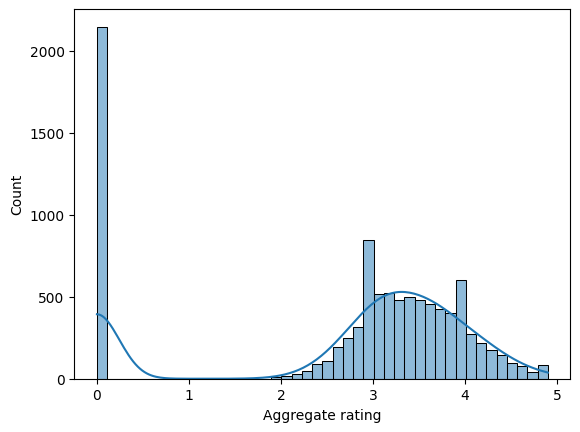

In [18]:
sns.histplot(df['Aggregate rating'], kde=True)

In [19]:
from collections import Counter
cuisine_list = df['Cuisines'].dropna().str.split(', ')
cuisine_count = Counter([c for sub in cuisine_list for c in sub])
cuisine_count.most_common(10)

[('North Indian', 3960),
 ('Chinese', 2735),
 ('Fast Food', 1986),
 ('Mughlai', 995),
 ('Italian', 764),
 ('Bakery', 745),
 ('Continental', 736),
 ('Cafe', 703),
 ('Desserts', 653),
 ('South Indian', 636)]

In [22]:
df.groupby("Country")['Average Cost for two'].mean().sort_values()

Country
Australia             24.083333
United States         26.152074
Canada                36.250000
United Kingdom        47.812500
New Zealand           69.750000
Turkey                84.852941
Brazil               134.666667
Singapore            155.750000
UAE                  166.416667
Qatar                223.750000
South Africa         419.733333
India                623.370319
Phillipines         1606.818182
Sri Lanka           2375.000000
Indonesia         281190.476190
Name: Average Cost for two, dtype: float64

<Axes: xlabel='Price range', ylabel='Average Cost for two'>

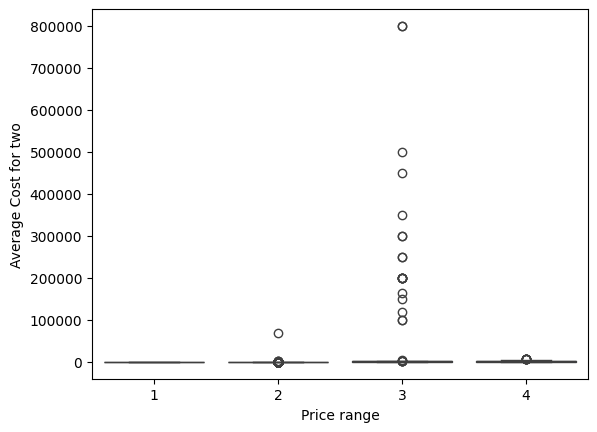

In [24]:
sns.boxplot(x='Price range', y='Average Cost for two', data=df)

In [27]:
df['City'].value_counts().head(20)

City
New Delhi          5473
Gurgaon            1118
Noida              1080
Faridabad           251
Ghaziabad            25
Bhubaneshwar         21
Lucknow              21
Ahmedabad            21
Amritsar             21
Guwahati             21
Rio de Janeiro       20
Brasí_lia            20
Albany               20
Doha                 20
Cape Town            20
Manchester           20
London               20
Edinburgh            20
Birmingham           20
Wellington City      20
Name: count, dtype: int64

In [28]:
df.groupby('Has Table booking')['Aggregate rating'].mean()

Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64

<Axes: xlabel='Average Cost for two', ylabel='Aggregate rating'>

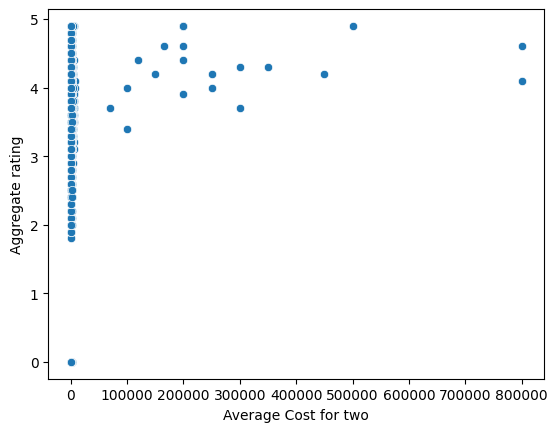

In [29]:
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df)

In [30]:
df[['Cuisines', 'Aggregate rating']].groupby("Cuisines").mean().sort_values("Aggregate rating", ascending=False).head(10)

,Aggregate rating
Cuisines,
"Burger, Bar Food, Steak",4.9
"American, Burger, Grill",4.9
"American, Caribbean, Seafood",4.9
"American, Coffee and Tea",4.9
"Mexican, American, Healthy Food",4.9
"Italian, Bakery, Continental",4.9
"BBQ, Breakfast, Southern",4.9
"European, German",4.9
"Hawaiian, Seafood",4.9


In [33]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [40]:
df[df["Is delivering now"]=='Yes'][["Restaurant Name","City"]].head()

,Restaurant Name,City
787,The Night Factory,Chandigarh
1343,Cake 24x7,Gurgaon
1345,Cake Point,Gurgaon
1356,Grandma's Kitchen,Gurgaon
1403,Dabba Meat,Gurgaon


<Axes: xlabel='Longitude', ylabel='Latitude'>

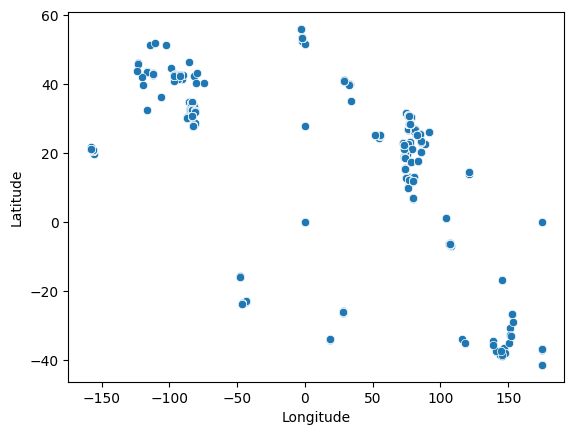

In [41]:
sns.scatterplot(x='Longitude', y='Latitude', data=df)

In [42]:
df['High_Rated'] = df['Aggregate rating'] >= 4.5

df.groupby('Country')['High_Rated'].mean().sort_values(ascending=False)*100

Country
Phillipines       54.545455
Indonesia         33.333333
New Zealand       30.000000
UAE               30.000000
Turkey            29.411765
United Kingdom    28.750000
Brazil            26.666667
South Africa      20.000000
Qatar             20.000000
United States     15.668203
Sri Lanka         10.000000
Australia          4.166667
India              1.340730
Canada             0.000000
Singapore          0.000000
Name: High_Rated, dtype: float64